In [7]:
import pandas as pd 
df=pd.read_csv("transactions_jan_may.csv",index_col=0)
# print(df.head(10))
print(df.columns)
print(df.info)
print(df.describe)


Index(['INSTANCE_DATE', 'GROUP_EN', 'PROCEDURE_EN', 'IS_OFFPLAN_EN',
       'IS_FREE_HOLD_EN', 'USAGE_EN', 'AREA_EN', 'PROP_TYPE_EN',
       'PROP_SB_TYPE_EN', 'TRANS_VALUE', 'PROCEDURE_AREA', 'ACTUAL_AREA',
       'ROOMS_EN', 'PARKING', 'NEAREST_METRO_EN', 'NEAREST_MALL_EN',
       'NEAREST_LANDMARK_EN', 'TOTAL_BUYER', 'TOTAL_SELLER',
       'MASTER_PROJECT_EN', 'PROJECT_EN'],
      dtype='object')
<bound method DataFrame.info of                           INSTANCE_DATE GROUP_EN             PROCEDURE_EN  \
TRANSACTION_NUMBER                                                          
102-87945-2024      2024-11-25 11:59:46    Sales  Sell - Pre registration   
102-93830-2024      2024-11-25 08:32:30    Sales  Sell - Pre registration   
102-98258-2024      2024-11-25 12:34:07    Sales  Sell - Pre registration   
102-98334-2024      2024-11-25 10:45:04    Sales  Sell - Pre registration   
102-98841-2024      2024-11-25 08:06:58    Sales  Sell - Pre registration   
...                       

In [8]:
# df.plot()
col_names=df.columns

print(col_names)
print(df.shape)
df.head(100)
pd.set_option('display.max_colwidth', None)


Index(['INSTANCE_DATE', 'GROUP_EN', 'PROCEDURE_EN', 'IS_OFFPLAN_EN',
       'IS_FREE_HOLD_EN', 'USAGE_EN', 'AREA_EN', 'PROP_TYPE_EN',
       'PROP_SB_TYPE_EN', 'TRANS_VALUE', 'PROCEDURE_AREA', 'ACTUAL_AREA',
       'ROOMS_EN', 'PARKING', 'NEAREST_METRO_EN', 'NEAREST_MALL_EN',
       'NEAREST_LANDMARK_EN', 'TOTAL_BUYER', 'TOTAL_SELLER',
       'MASTER_PROJECT_EN', 'PROJECT_EN'],
      dtype='object')
(478, 21)


In [9]:
uni_dict={}
column=[col for col in df.columns if col in ['GROUP_EN', 'PROCEDURE_EN', 'IS_OFFPLAN_EN',
       'IS_FREE_HOLD_EN', 'USAGE_EN', 'AREA_EN', 'PROP_TYPE_EN',
       'PROP_SB_TYPE_EN',
       'ROOMS_EN', 'NEAREST_METRO_EN', 'NEAREST_MALL_EN',
       'NEAREST_LANDMARK_EN',
       'MASTER_PROJECT_EN', 'PROJECT_EN']]
print(column)
# for col in column:
#     uni_dict.update({col: df[col].unique().tolist()})
# uni_dict


['GROUP_EN', 'PROCEDURE_EN', 'IS_OFFPLAN_EN', 'IS_FREE_HOLD_EN', 'USAGE_EN', 'AREA_EN', 'PROP_TYPE_EN', 'PROP_SB_TYPE_EN', 'ROOMS_EN', 'NEAREST_METRO_EN', 'NEAREST_MALL_EN', 'NEAREST_LANDMARK_EN', 'MASTER_PROJECT_EN', 'PROJECT_EN']


In [10]:
import numpy as np
## determine proximity to city based on proximity to malls
df['Near_city'] = np.where(df['NEAREST_MALL_EN'].isna(), 'No', 'Yes')
df['Near_metro'] = np.where(df['NEAREST_METRO_EN'].isna(), 'No', 'Yes')
print("list of malls",df['NEAREST_MALL_EN'].unique())
df['Near_city'].head(10)

list of malls ['Marina Mall' nan 'Mall of the Emirates' 'Ibn-e-Battuta Mall'
 'Dubai Mall' 'City Centre Mirdif']


TRANSACTION_NUMBER
102-87945-2024    Yes
102-93830-2024     No
102-98258-2024     No
102-98334-2024    Yes
102-98841-2024    Yes
102-98859-2024    Yes
102-98891-2024    Yes
102-98892-2024    Yes
102-98893-2024    Yes
102-98894-2024    Yes
Name: Near_city, dtype: object

In [11]:
sale_df=df.loc[df.GROUP_EN=='Sales']

sale_df.shape
# SalesSupplyIndex=len(sale_df)/len(df)
# print(SalesSupplyIndex)
df_grpd = df.groupby(['PROP_TYPE_EN', 'AREA_EN', 'ACTUAL_AREA'])['TRANS_VALUE'].agg(['count', 'sum', 'mean', 'median']).reset_index()

print(df_grpd.sample(20))

# display(df_grpd)
sale_df_grpd=sale_df.groupby(['PROP_TYPE_EN', 'AREA_EN', 'ACTUAL_AREA'])['TRANS_VALUE'].agg(['count', 'sum', 'mean', 'median']).reset_index()
display(sale_df_grpd.sample(20))

##Sales Supply Index = (Number of Properties Listed for Sale in the Period/Total Number of Properties in the Market)

    PROP_TYPE_EN                       AREA_EN  ACTUAL_AREA  count  \
220         Unit         DUBAI PRODUCTION CITY       136.57      1   
351         Unit                    THE GREENS       104.67      2   
50          Land               Al Hebiah Fifth       146.37      1   
325         Unit                 PALM JUMEIRAH        32.96      1   
251         Unit                 JUMEIRAH GOLF       167.91      2   
116         Unit                     AL FURJAN       144.73      1   
126         Unit                      Al Kifaf       112.37      1   
190         Unit  DUBAI LAND RESIDENCE COMPLEX        35.06      1   
24      Building                          MIRA       284.85      2   
216         Unit         DUBAI PRODUCTION CITY        46.08      1   
352         Unit                    THE GREENS       121.24      1   
203         Unit                  DUBAI MARINA        73.61      1   
209         Unit                  DUBAI MARINA       127.09      2   
262         Unit    

,PROP_TYPE_EN,AREA_EN,ACTUAL_AREA,count,sum,mean,median
102,Unit,BUSINESS BAY,50.57,2,1959333.00,979666.50,979666.50
255,Unit,PALM JUMEIRAH,32.93,1,1200000.00,1200000.00,1200000.00
178,Unit,INTERNATIONAL CITY PH 1,43.00,1,275000.00,275000.00,275000.00
87,Unit,BURJ KHALIFA,62.06,1,1200000.00,1200000.00,1200000.00
89,Unit,BURJ KHALIFA,84.08,1,3170000.00,3170000.00,3170000.00
202,Unit,JUMEIRAH LAKES TOWERS,128.34,1,1360000.00,1360000.00,1360000.00
215,Unit,JUMEIRAH VILLAGE CIRCLE,45.57,1,555000.00,555000.00,555000.00
141,Unit,DUBAI LAND RESIDENCE COMPLEX,101.65,1,710000.00,710000.00,710000.00
105,Unit,BUSINESS BAY,70.44,1,1900000.00,1900000.00,1900000.00
49,Land,JUMEIRAH VILLAGE CIRCLE,2640.20,1,24400000.00,24400000.00,24400000.00


In [12]:
###rental data from a differernt csv and page on website
rent_df=pd.read_csv("rents_sample.csv")
print(rent_df.columns)
rent_df_grpd=rent_df.groupby(['PROP_TYPE_EN', 'AREA_EN', 'ACTUAL_AREA'])['ANNUAL_AMOUNT'].agg(['count', 'sum', 'mean', 'median']).reset_index()
rent_df_grpd.head(10)
rent_df.shape

Index(['REGISTRATION_DATE', 'START_DATE', 'END_DATE', 'VERSION_EN', 'AREA_EN',
       'CONTRACT_AMOUNT', 'ANNUAL_AMOUNT', 'IS_FREE_HOLD_EN', 'ACTUAL_AREA',
       'PROP_TYPE_EN', 'PROP_SUB_TYPE_EN', 'ROOMS', 'USAGE_EN',
       'NEAREST_METRO_EN', 'NEAREST_MALL_EN', 'NEAREST_LANDMARK_EN', 'PARKING',
       'TOTAL_PROPERTIES', 'MASTER_PROJECT_EN', 'PROJECT_EN'],
      dtype='object')


(190415, 20)

In [13]:
merged_df = pd.merge( df_grpd[['PROP_TYPE_EN', 'AREA_EN', 'ACTUAL_AREA', 'count','sum','mean']], sale_df_grpd[['PROP_TYPE_EN', 'AREA_EN', 'ACTUAL_AREA', 'count','sum','mean']], on=['PROP_TYPE_EN', 'AREA_EN', 'ACTUAL_AREA'], suffixes=('_total', '_sale') )
# Calculate the Sales Supply Index (SSI)
merged_df['SSI'] = merged_df['count_sale'] / merged_df['count_total']
display(merged_df.head)
merged_df.to_csv('cum.csv')

<bound method NDFrame.head of     PROP_TYPE_EN              AREA_EN  ACTUAL_AREA  count_total  sum_total  \
0       Building            AL FURJAN       172.36            2  6300000.0   
1       Building            AL FURJAN       221.90            1  3400000.0   
2       Building    ARABIAN RANCHES I       334.84            2  8158920.0   
3       Building    ARABIAN RANCHES I       336.34            2  8100000.0   
4       Building  ARABIAN RANCHES III       120.29            1  1959888.0   
..           ...                  ...          ...          ...        ...   
284         Unit      Um Suqaim Third       120.16            1  3350000.0   
285         Unit         Warsan First        58.59            2  1261699.0   
286         Unit         Warsan First        86.50            1  1000000.0   
287         Unit        Zaabeel First       187.44            1  8400000.0   
288         Unit       Zaabeel Second       151.54            2  8050000.0   

     mean_total  count_sale   sum

In [14]:

# Create grouped DataFrame for rent data


rent_df_grpd = rent_df_grpd.rename(columns={'count': 'count_rent', 'sum': 'sum_rent', 'mean': 'mean_rent'})

# Ensure the main grouped DataFrame and sale grouped DataFrame have appropriate suffixes
df_grpd = df_grpd.rename(columns={'count': 'count_total', 'sum': 'sum_total', 'mean': 'mean_total'})
sale_df_grpd = sale_df_grpd.rename(columns={'count': 'count_sale', 'sum': 'sum_sale', 'mean': 'mean_sale'})
#print(sale_df_grpd.head(10))
# Merge the grouped DataFrames
merged_df = pd.merge(df_grpd, rent_df_grpd, on=['PROP_TYPE_EN', 'AREA_EN', 'ACTUAL_AREA'], how='left')
merged_df = pd.merge(merged_df, sale_df_grpd, on=['PROP_TYPE_EN', 'AREA_EN', 'ACTUAL_AREA'], how='left')

# Display the first 20 rows
# print(merged_df.head(20))
# display(merged_df.head(20))

merged_df['RSI']=merged_df['count_rent']/merged_df['count_total']
merged_df['SSI'] = merged_df['count_sale'] / merged_df['count_total']
merged_df['Rent_vs_Sales_Supply_Index']=merged_df['count_rent']/merged_df['count_sale'] 

print(merged_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   PROP_TYPE_EN                360 non-null    object 
 1   AREA_EN                     360 non-null    object 
 2   ACTUAL_AREA                 360 non-null    float64
 3   count_total                 360 non-null    int64  
 4   sum_total                   360 non-null    float64
 5   mean_total                  360 non-null    float64
 6   median_x                    360 non-null    float64
 7   count_rent                  1 non-null      float64
 8   sum_rent                    1 non-null      float64
 9   mean_rent                   1 non-null      float64
 10  median_y                    1 non-null      float64
 11  count_sale                  289 non-null    float64
 12  sum_sale                    289 non-null    float64
 13  mean_sale                   289 non

In [15]:
rent_df_grpd_cpy=rent_df_grpd.copy()
# print(rent_df_grpd_cpy.shape)
rent_df_grpd_cpy.loc[rent_df_grpd_cpy['PROP_TYPE_EN'] == 'Building',"Gross Yield (%) on Asking Price (AED/SqFt)"]= (rent_df_grpd_cpy['mean_rent']/rent_df_grpd_cpy['ACTUAL_AREA'])
# print(rent_df_grpd_cpy.shape)
sale_df_grpd['Sale_asking_Price(AED/SqFt)']=(sale_df_grpd['mean_sale']/sale_df_grpd['ACTUAL_AREA'])
sale_df_grpd['Sale_asking_Price']=sale_df_grpd['mean_sale']
rent_df_grpd_cpy['Rent_asking_Price']=(rent_df_grpd_cpy['mean_rent']/rent_df_grpd_cpy['ACTUAL_AREA'])



# print(sale_df_grpd.columns)

rent_df_grpd_cpy['Rent_asking_Price(AED/SqFt)']=(rent_df_grpd_cpy['mean_rent']/rent_df_grpd_cpy['ACTUAL_AREA'])
# print(rent_df_grpd_cpy.head(10))

final_merge_df=pd.merge(rent_df_grpd_cpy,sale_df_grpd,on=['PROP_TYPE_EN', 'AREA_EN', 'ACTUAL_AREA'], how='left')
#print(final_merge_df.head(10))
##Formula: Gross Yield On Asking Price (AED/Sqft)= (Annual Rental Asking Price (AED/Sqft) / Sales Asking Price (AED/Sqft)
final_merge_df['Gross Yield On Asking Price (AED/Sqft)']=final_merge_df['Rent_asking_Price(AED/SqFt)']/final_merge_df['Sale_asking_Price(AED/SqFt)']
final_merge_df['Gross Yield On Asking Price']=final_merge_df['Rent_asking_Price']/final_merge_df['Sale_asking_Price']

print(final_merge_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54871 entries, 0 to 54870
Data columns (total 18 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   PROP_TYPE_EN                                54871 non-null  object 
 1   AREA_EN                                     54871 non-null  object 
 2   ACTUAL_AREA                                 54871 non-null  float64
 3   count_rent                                  54871 non-null  int64  
 4   sum_rent                                    54871 non-null  float64
 5   mean_rent                                   54871 non-null  float64
 6   median_x                                    54871 non-null  float64
 7   Gross Yield (%) on Asking Price (AED/SqFt)  51 non-null     float64
 8   Rent_asking_Price                           54871 non-null  float64
 9   Rent_asking_Price(AED/SqFt)                 54871 non-null  float64
 10  count_sale

In [16]:
final_merge_df.sample(100)

,PROP_TYPE_EN,AREA_EN,ACTUAL_AREA,count_rent,sum_rent,mean_rent,median_x,Gross Yield (%) on Asking Price (AED/SqFt),Rent_asking_Price,Rent_asking_Price(AED/SqFt),count_sale,sum_sale,mean_sale,median_y,Sale_asking_Price(AED/SqFt),Sale_asking_Price,Gross Yield On Asking Price (AED/Sqft),Gross Yield On Asking Price
27611,Unit,Al Yelayiss 2,209.72,1,300235.53,300235.530000,300235.53,NaN,1431.601802,1431.601802,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36392,Unit,Mankhool,104.25,1,65000.00,65000.000000,65000.00,NaN,623.501199,623.501199,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18602,Unit,Al Qusais Industrial Second,81.00,2,159000.00,79500.000000,79500.00,NaN,981.481481,981.481481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49576,Villa,Abu Hail,300.00,1,45000.00,45000.000000,45000.00,NaN,150.000000,150.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20417,Unit,Al Rega,38.09,2,125584.92,62792.460000,62792.46,NaN,1648.528748,1648.528748,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40967,Unit,Nadd Hessa,83.29,2,87000.00,43500.000000,43500.00,NaN,522.271581,522.271581,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42450,Unit,Naif,50.00,142,6321330.57,44516.412465,20000.00,NaN,890.328249,890.328249,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50605,Villa,Al Muteena,0.00,10,985000.00,98500.000000,80000.00,NaN,inf,inf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40318,Unit,Nadd Hessa,40.69,3,102500.00,34166.666667,33000.00,NaN,839.682150,839.682150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
final_merge_df.to_csv('final_merge.csv')
final_merge_df.describe()

c:\Users\ccb\OneDrive\Desktop\tensorflow\DubaiRealEstateProject\my_venv\lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
c:\Users\ccb\OneDrive\Desktop\tensorflow\DubaiRealEstateProject\my_venv\lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
c:\Users\ccb\OneDrive\Desktop\tensorflow\DubaiRealEstateProject\my_venv\lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,ACTUAL_AREA,count_rent,sum_rent,mean_rent,median_x,Gross Yield (%) on Asking Price (AED/SqFt),Rent_asking_Price,Rent_asking_Price(AED/SqFt),count_sale,sum_sale,mean_sale,median_y,Sale_asking_Price(AED/SqFt),Sale_asking_Price,Gross Yield On Asking Price (AED/Sqft),Gross Yield On Asking Price
count,5.487100e+04,54871.000000,5.487100e+04,5.487100e+04,5.487100e+04,51.000000,5.487100e+04,5.487100e+04,1.0,1.0,1.0,1.0,1.000000,1.0,1.000000,1.000000
mean,7.114288e+03,3.470230,1.059500e+06,1.873526e+05,1.856201e+05,inf,inf,inf,1.0,4550000.0,4550000.0,4550000.0,30025.075888,4550000.0,0.049451,0.000326
std,1.592773e+06,14.046872,2.917668e+07,5.512239e+05,5.535213e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000e+00,1.000000,3.300000e-01,3.300000e-01,3.300000e-01,0.000008,8.121366e-06,8.121366e-06,1.0,4550000.0,4550000.0,4550000.0,30025.075888,4550000.0,0.049451,0.000326
25%,5.110000e+01,1.000000,6.200000e+04,4.547917e+04,4.500000e+04,77.384167,5.414651e+02,5.414651e+02,1.0,4550000.0,4550000.0,4550000.0,30025.075888,4550000.0,0.049451,0.000326
50%,8.920000e+01,1.000000,1.240000e+05,7.000000e+04,7.000000e+04,322.222222,7.702530e+02,7.702530e+02,1.0,4550000.0,4550000.0,4550000.0,30025.075888,4550000.0,0.049451,0.000326
75%,1.519900e+02,2.000000,2.850000e+05,1.390000e+05,1.350000e+05,806.454723,1.311361e+03,1.311361e+03,1.0,4550000.0,4550000.0,4550000.0,30025.075888,4550000.0,0.049451,0.000326
max,3.730996e+08,863.000000,5.793960e+09,2.182340e+07,2.182340e+07,inf,inf,inf,1.0,4550000.0,4550000.0,4550000.0,30025.075888,4550000.0,0.049451,0.000326


In [20]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import IsolationForest
from sklearn.compose import ColumnTransformer



# Identify numeric and categorical columns
numeric_features = final_merge_df.select_dtypes(include=['float64', 'int64']).columns
print(numeric_features)
categorical_features = final_merge_df.select_dtypes(include=['object']).columns

# Initialize StandardScaler and OneHotEncoder
scaler = StandardScaler()
encoder = OneHotEncoder()
final_merge_df.replace([np.inf, -np.inf], np.nan, inplace=True)
# Apply StandardScaler to numerical features
final_merge_df_num_scaled = pd.DataFrame(scaler.fit_transform(final_merge_df[numeric_features]), columns=numeric_features)





# Apply OneHotEncoder to categorical features
final_merge_df_cat_encoded = pd.DataFrame(encoder.fit_transform(final_merge_df[categorical_features]).toarray(),
                                    columns=encoder.get_feature_names_out(categorical_features))

# Combine the scaled numerical and encoded categorical features
df_processed = pd.concat([final_merge_df_num_scaled, final_merge_df_cat_encoded], axis=1)

# Check the resulting processed data
print(df_processed.sample(5))

Index(['ACTUAL_AREA', 'count_rent', 'sum_rent', 'mean_rent', 'median_x',
       'Gross Yield (%) on Asking Price (AED/SqFt)', 'Rent_asking_Price',
       'Rent_asking_Price(AED/SqFt)', 'count_sale', 'sum_sale', 'mean_sale',
       'median_y', 'Sale_asking_Price(AED/SqFt)', 'Sale_asking_Price',
       'Gross Yield On Asking Price (AED/Sqft)',
       'Gross Yield On Asking Price'],
      dtype='object')
       ACTUAL_AREA  count_rent  sum_rent  mean_rent  median_x  \
40691    -0.004422   -0.104667 -0.033640  -0.269136 -0.264889   
6575     -0.004455   -0.175858 -0.030885  -0.052525 -0.049177   
50849    -0.004357   -0.175858 -0.032201  -0.122188 -0.118551   
16556    -0.004389    0.180097 -0.024180  -0.232845 -0.229659   
22167    -0.004363   -0.175858 -0.034429  -0.240109 -0.235982   

       Gross Yield (%) on Asking Price (AED/SqFt)  Rent_asking_Price  \
40691                                         NaN          -0.113282   
6575                                          NaN           

In [21]:
# Use Isolation Forest
iforest=IsolationForest(contamination=0.01)
iforest.fit(df_processed)
# outliers=iforest.predict(df_processed)
# print(df_processed[outliers==-1].head(10))

df_processed['anomaly_score'] = iforest.fit_predict(df_processed)

In [ ]:
anomalies=(df_processed.loc[df_processed['anomaly_score']==-1])
print("size of anomaly data",anomalies.shape)
anomalies.to_csv('anomalies.csv')
anomalies_index = df_processed.loc[df_processed.anomaly_score == -1].index.to_list() 
# print(type(anomalies_index))
anomalies_df_sales = df_processed.loc[anomalies_index] # Add row numbers to anomalies DataFrame 
display(anomalies_df_sales.sample(10))

# Inverse transform categorical columns 
inverse_cat = encoder.inverse_transform(anomalies_df_sales[encoder.get_feature_names_out(categorical_features)]) 
##Combine inverse transformed categorical with numerical data 
anomalies_original = pd.concat([pd.DataFrame(scaler.inverse_transform(anomalies[numeric_features]), columns=numeric_features), pd.DataFrame(inverse_cat, columns=categorical_features)], axis=1) 
# View original rows with anomalies

anomalies_original.shape
anomalies_original.columns
print("total_data_count",final_merge_df.shape)
print("anomaly_count",anomalies_original.shape)

size of anomaly data (548, 212)


,ACTUAL_AREA,count_rent,sum_rent,mean_rent,median_x,Gross Yield (%) on Asking Price (AED/SqFt),Rent_asking_Price,Rent_asking_Price(AED/SqFt),count_sale,sum_sale,...,AREA_EN_Wadi Al Safa 4,AREA_EN_Wadi Al Safa 5,AREA_EN_Wadi Al Safa 6,AREA_EN_Wadi Al Safa 7,AREA_EN_Warsan Fourth,AREA_EN_World Islands,AREA_EN_Yaraah,AREA_EN_Zaabeel First,AREA_EN_Zaabeel Second,anomaly_score
50564,-0.003998,-0.104667,0.033852,1.517070,1.513904,NaN,-0.078293,-0.078293,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1
36788,0.005373,-0.104667,-0.008507,0.396012,0.397499,NaN,-0.135823,-0.135823,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1
50577,-0.003947,-0.175858,0.008243,2.018522,2.013274,NaN,-0.069834,-0.069834,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1
41956,-0.004453,0.749624,3.322564,12.359241,12.311074,NaN,13.199895,13.199895,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1
50579,-0.003686,-0.175858,0.004816,1.837106,1.832611,NaN,-0.095679,-0.095679,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1
559,0.002211,-0.175858,0.010775,2.152552,2.146748,NaN,-0.131410,-0.131410,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1
28417,-0.004455,-0.175858,0.066128,5.082439,5.064474,NaN,6.668087,6.668087,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1
7666,-0.004452,4.380358,2.548496,1.764971,1.760775,NaN,1.983804,1.983804,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1
8464,-0.004428,9.719674,20.621111,7.470200,6.014193,NaN,2.823757,2.823757,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1
465,0.013031,-0.175858,-0.007524,1.183957,1.182173,NaN,-0.135642,-0.135642,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1


total_data_count (54871, 18)
anaomaly_count (548, 18)


<Axes: xlabel='count', ylabel='AREA_EN'>

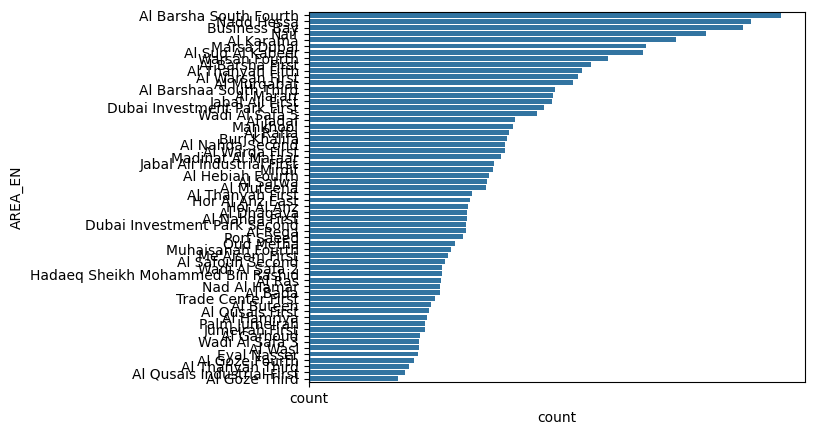

In [26]:
import seaborn as sns
final_merge_df.AREA_EN.value_counts().plot(kind='box')
sns.countplot(data=final_merge_df,y='AREA_EN',order=final_merge_df.AREA_EN.value_counts().nlargest(60).index)

Index(['ACTUAL_AREA', 'count_rent', 'sum_rent', 'mean_rent', 'median_x',
       'Gross Yield (%) on Asking Price (AED/SqFt)', 'Rent_asking_Price',
       'Rent_asking_Price(AED/SqFt)', 'count_sale', 'sum_sale', 'mean_sale',
       'median_y', 'Sale_asking_Price(AED/SqFt)', 'Sale_asking_Price',
       'Gross Yield On Asking Price (AED/Sqft)', 'Gross Yield On Asking Price',
       'PROP_TYPE_EN', 'AREA_EN'],
      dtype='object')


<Axes: xlabel='count', ylabel='AREA_EN'>

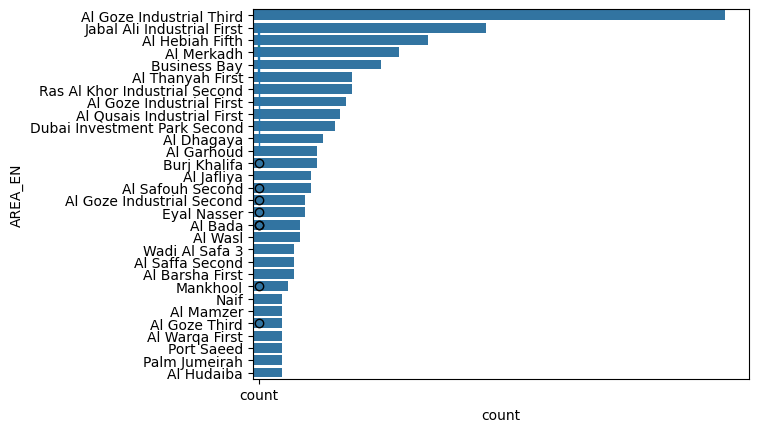

In [44]:
print(anomalies_original.columns)
anomalies_original.AREA_EN.value_counts().plot(kind='box')
sns.countplot(data=anomalies_original,y='AREA_EN',order=anomalies_original.AREA_EN.value_counts().nlargest(30).index)

In [41]:
import seaborn as sns
anom_grpd = anomalies_original.groupby(['AREA_EN', 'PROP_TYPE_EN'])['Rent_asking_Price(AED/SqFt)'].mean().reset_index()
display(anom_grpd.loc[anom_grpd.AREA_EN=='Al Goze Industrial Third'])
# sns.boxplot(data=anomalies_original,y='Rent_asking_Price(AED/SqFt)')

,AREA_EN,PROP_TYPE_EN,Rent_asking_Price(AED/SqFt)
21,Al Goze Industrial Third,Land,49.303593
22,Al Goze Industrial Third,Unit,87450.249343


,AREA_EN,PROP_TYPE_EN,Rent_asking_Price(AED/SqFt)
53,Al Goze Industrial Third,Land,49.303593
54,Al Goze Industrial Third,Unit,22973.732787


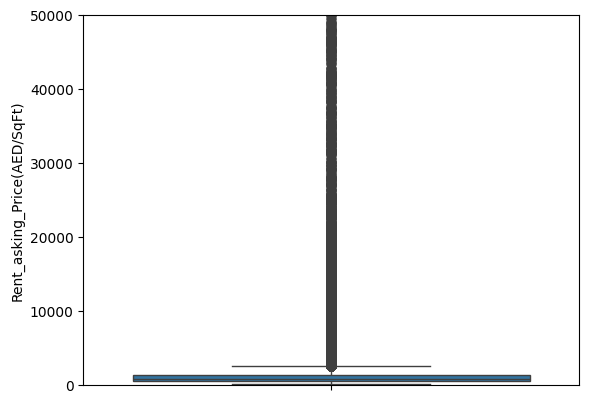

In [ ]:
import matplotlib.pyplot as plt
sns.boxplot(data=final_merge_df,y='Rent_asking_Price(AED/SqFt)')
plt.ylim(0,50000)
final_merge_df_grpd = final_merge_df.groupby(['AREA_EN', 'PROP_TYPE_EN'])['Rent_asking_Price(AED/SqFt)'].mean().reset_index()
final_merge_df_grpd.loc[final_merge_df.AREA_EN=='Al Goze Industrial Third']

,AREA_EN,PROP_TYPE_EN,Sale_asking_Price(AED/SqFt)
53,Al Goze Industrial Third,Land,NaN
54,Al Goze Industrial Third,Unit,NaN


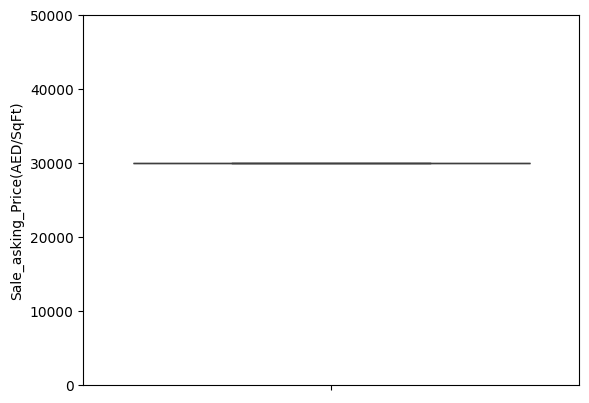

In [48]:
import matplotlib.pyplot as plt
sns.boxplot(data=final_merge_df,y='Sale_asking_Price(AED/SqFt)')
plt.ylim(0,50000)
final_merge_df_grpd = final_merge_df.groupby(['AREA_EN', 'PROP_TYPE_EN'])['Sale_asking_Price(AED/SqFt)'].mean().reset_index()
display(final_merge_df_grpd.loc[final_merge_df_grpd.AREA_EN=='Al Goze Industrial Third'])

In [46]:
import seaborn as sns
anom_grpd = anomalies_original.groupby(['AREA_EN', 'PROP_TYPE_EN'])['Sale_asking_Price(AED/SqFt)'].mean().reset_index()
display(anom_grpd.loc[anom_grpd.AREA_EN=='Al Goze Industrial Third'])
# sns.boxplot(data=anomalies_original,y='Rent_asking_Price(AED/SqFt)')

,AREA_EN,PROP_TYPE_EN,Sale_asking_Price(AED/SqFt)
21,Al Goze Industrial Third,Land,NaN
22,Al Goze Industrial Third,Unit,NaN
